# Lab9 - Sandeep Pandey - 8878312

In [17]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [15]:
# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 28*28))
test_images = test_images.reshape((-1, 28*28))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

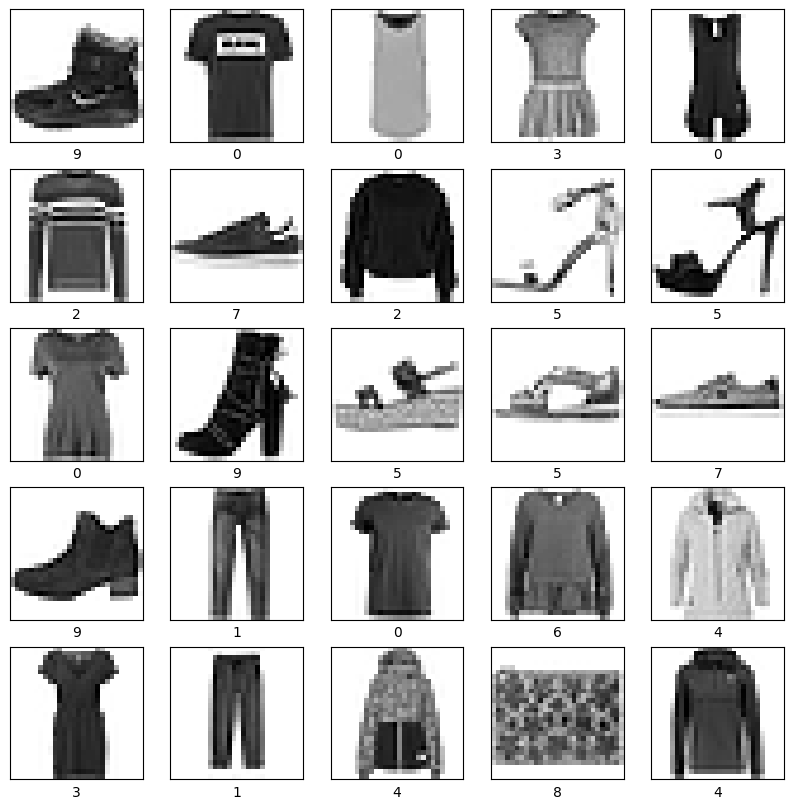

In [16]:
# Displaying a sample of images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(train_labels[i]))
plt.show()

In [18]:
# Dataset information
num_train, img_size = train_images.shape[0], train_images.shape[1]
num_test = test_images.shape[0]
num_classes = len(np.unique(np.argmax(train_labels, axis=1)))

In [19]:

# Creating and Training the Model
# Function to create a model
def create_model(layers, activation, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(img_size,)))
    for layer_size in layers:
        model.add(Dense(layer_size, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameters configurations
configurations = [
    {"layers": [64, 64], "activation": "relu", "optimizer": "adam"},
    {"layers": [128, 64, 32], "activation": "relu", "optimizer": "sgd"},
    {"layers": [32, 32], "activation": "sigmoid", "optimizer": "adam"}
]


In [20]:
# Train and evaluate models
for config in configurations:
    model = create_model(**config)
    model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Configuration: {config}, Accuracy: {test_acc}")

Epoch 1/10
750/750 [==============================] - 8s 9ms/step - loss: 0.5648 - accuracy: 0.8025 - val_loss: 0.4236 - val_accuracy: 0.8480
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3962 - accuracy: 0.8572 - val_loss: 0.3988 - val_accuracy: 0.8547
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3576 - accuracy: 0.8709 - val_loss: 0.3693 - val_accuracy: 0.8652
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3296 - accuracy: 0.8789 - val_loss: 0.3547 - val_accuracy: 0.8722
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.3100 - accuracy: 0.8859 - val_loss: 0.3428 - val_accuracy: 0.8776
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2956 - accuracy: 0.8913 - val_loss: 0.3438 - val_accuracy: 0.8781
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2841 - accuracy: 0.8943 - val_loss: 0.3486 - val_accuracy: 0.8785
Epoch 

In [21]:
# Evaluating the Model
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Choose the best model for evaluation
best_model = create_model(**configurations[0]) # The first configuration is the best
best_model.fit(train_images, train_labels, epochs=10, batch_size=64)

# Evaluate the best model
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Confusion Matrix
predictions = best_model.predict(test_images)
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))

Epoch 1/10
938/938 [==============================] - 9s 8ms/step - loss: 0.5432 - accuracy: 0.8095
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3930 - accuracy: 0.8601
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3548 - accuracy: 0.8706
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3321 - accuracy: 0.8790
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3139 - accuracy: 0.8856
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3021 - accuracy: 0.8882
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2887 - accuracy: 0.8931
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2780 - accuracy: 0.8966
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2708 - accuracy: 0.8979
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8702

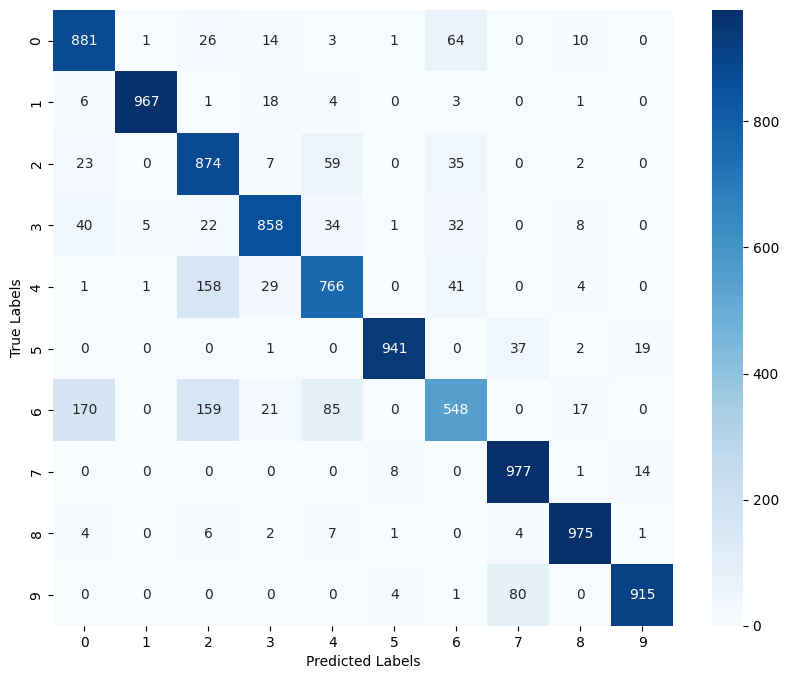

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

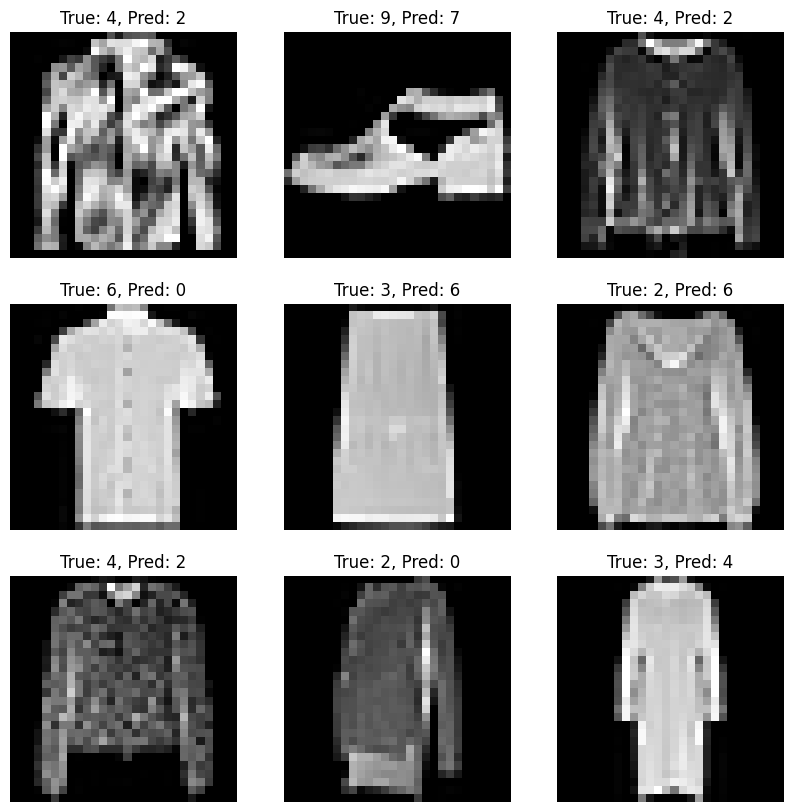

In [23]:
# Displaying Misclassified Examples
misclassified_idxs = np.where(np.argmax(test_labels, axis=1) != np.argmax(predictions, axis=1))[0]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    idx = misclassified_idxs[i]
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}, Pred: {np.argmax(predictions[idx])}")
    plt.axis('off')
plt.show()